Load the Data

In [16]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(nb_words=10000)

print(len(train_data))
print(len(test_data))

8982
2246


Vectorize the Data

In [24]:

import  numpy  as  np

def  vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

Vectorize the Labels

In [25]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

Build the Network

In [33]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

Compile the Network

In [34]:
model.compile(optimizer='rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

Set Aside Validation Set

In [35]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]


Train the Model

In [36]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   nb_epoch=9,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
1536/7982 [====>.........................] - ETA: 0s - loss: 3.5894 - acc: 0.3132

/home/ubuntu/anaconda3/envs/mxnet_p36/lib/python3.6/site-packages/mxnet/module/bucketing_module.py:403: UserWarning: Optimizer created manually outside Module but rescale_grad is not normalized to 1.0/batch_size/num_workers (1.0 vs. 0.001953125). Is this intended?
  force_init=force_init)


7982/7982 [==============================] - 1s - loss: 2.5531 - acc: 0.5313 - val_loss: 1.7014 - val_acc: 0.6310
Epoch 2/9
7982/7982 [==============================] - 1s - loss: 1.4096 - acc: 0.6997 - val_loss: 1.2906 - val_acc: 0.7140
Epoch 3/9
7982/7982 [==============================] - 1s - loss: 1.0545 - acc: 0.7780 - val_loss: 1.1246 - val_acc: 0.7510
Epoch 4/9
7982/7982 [==============================] - 1s - loss: 0.8434 - acc: 0.8175 - val_loss: 1.0222 - val_acc: 0.7860
Epoch 5/9
7982/7982 [==============================] - 1s - loss: 0.6728 - acc: 0.8571 - val_loss: 0.9526 - val_acc: 0.8000
Epoch 6/9
7982/7982 [==============================] - 1s - loss: 0.5431 - acc: 0.8893 - val_loss: 0.9148 - val_acc: 0.8130
Epoch 7/9
7982/7982 [==============================] - 1s - loss: 0.4406 - acc: 0.9074 - val_loss: 0.8719 - val_acc: 0.81700.908
Epoch 8/9
7982/7982 [==============================] - 1s - loss: 0.3540 - acc: 0.9241 - val_loss: 0.8923 - val_acc: 0.7980
Epoch 9/9
798

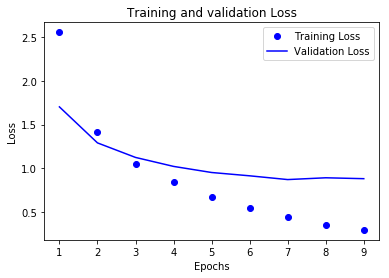

In [37]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['acc'])+ 1)
plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show();

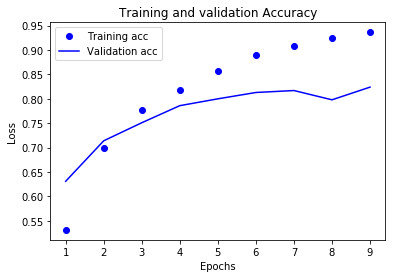

In [38]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show();

In [39]:
predictions = model.predict(x_test)

In [41]:
np.argmax(predictions[0])

3